# Building a Percolation Network

In [384]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

## Bond percolation on a square lattice

In [385]:
def grid_percolation(m, n, p, periodic=True, create_using=None):
    """Returns the two-dimensional percolated grid graph
    
    The percolated grid graph disconnected edges by probability p

    Parameters
    ----------
    m, n : int or iterable container of nodes
        If an integer, nodes are from `range(n)`.
        If a container, elements become the coordinate of the nodes.
    
    p : int
        Each connected edges from the lattice has probability p to be removed.

    periodic : bool or iterable
        If `periodic` is True, both dimensions are periodic. If False, none
        are periodic.  If `periodic` is iterable, it should yield 2 bool
        values indicating whether the 1st and 2nd axes, respectively, are
        periodic.

    create_using : NetworkX graph constructor, optional (default=nx.Graph)
        Graph type to create. If graph instance, then cleared before populated.
    """
    G = nx.grid_2d_graph(m, n, periodic, create_using)
    for e in G.edges:
        if np.random.random() < p:
            n1, n2 = e[0], e[1]
            G.remove_edge(n1, n2)
    return G


In [386]:
def plot_grid_percolation(G):
    """Plot """
    x1, y1 = (np.array(list(G.nodes)).T)[0], (np.array(list(G.nodes)).T)[1]
    x2, y2 = [], []
    m, n = list(G.nodes)[-1][0], list(G.nodes)[-1][1]
    for e in list(G.edges):
        n1, n2 = e[0], e[1]
        # if top row connect with the bottom row
        if (n1[1] == 0 and n2[1] == n) or (n2[1] == 0 and n1[1] == n):
            x2.append(n1[0])
            y2.append(n1[1])
            x2.append(n1[0])
            y2.append(n1[1] - 1/2)

            x2.append(n2[0])
            y2.append(n2[1])        
            x2.append(n2[0])
            y2.append(n2[1] + 1/2)
        # if the left column connect with the right column
        elif (n1[0] == 0 and n2[0] == m) or (n2[0] == 0 and n1[0] == m):
            x2.append(n1[0])
            y2.append(n1[1])
            x2.append(n1[0] - 1/2)
            y2.append(n1[1])

            x2.append(n2[0])
            y2.append(n2[1])
            x2.append(n2[0] + 1/2)
            y2.append(n2[1])
        
        else:
            x2.append(n1[0])
            x2.append(n2[0])
            y2.append(n1[1])
            y2.append(n2[1])

    plt.plot(x1, y1, "o")
    for i in range(0, len(x2), 2):
        plt.plot([x2[i], x2[i+1]], [y2[i], y2[i+1]], color="k")
    plt.axis("off")

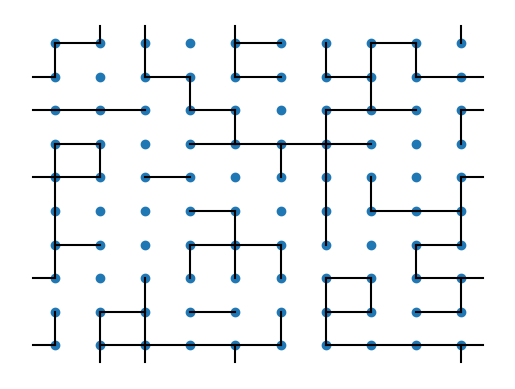

In [387]:
m, n, p = 10, 10, 0.6
G = grid_percolation(m, n, p)
plot_grid_percolation(G)

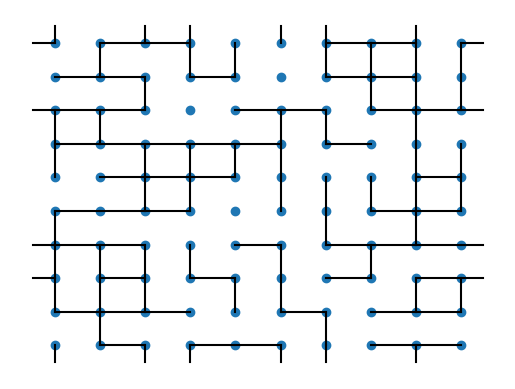

In [388]:
m, n, p = 10, 10, 0.5
G = grid_percolation(m, n, p)
plot_grid_percolation(G)

## Finding the clusters

6


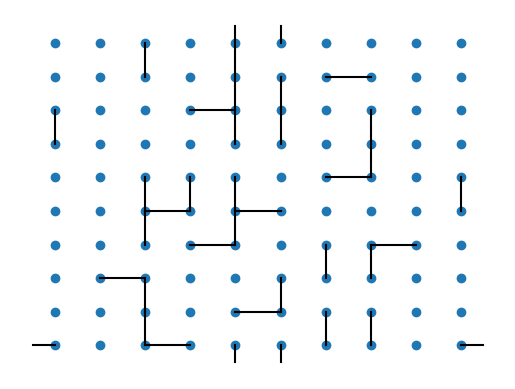

In [389]:
m, n, p = 10, 10, 0.8

G = grid_percolation(m, n, p)
clusters = list(nx.connected_components(G))

max_val = 0
max_index = []
for i, j in enumerate(clusters):
    if len(j) > max_val:
        max_index = [i]
        max_val = len(j)
    elif len(j) == max_val:
        max_index.append(i)

print(max_val)
plot_grid_percolation(G)


In [390]:
m, n, p = 1024, 1024, 0.5

G = grid_percolation(m, n, p)

clusters = list(nx.connected_components(G))

max_val = 0
max_index = []
for i, j in enumerate(clusters):
    if len(j) > max_val:
        max_index = [i]
        max_val = len(j)
    elif len(j) == max_val:
        max_index.append(i)

print(max_val, max_index)

508937 [2]


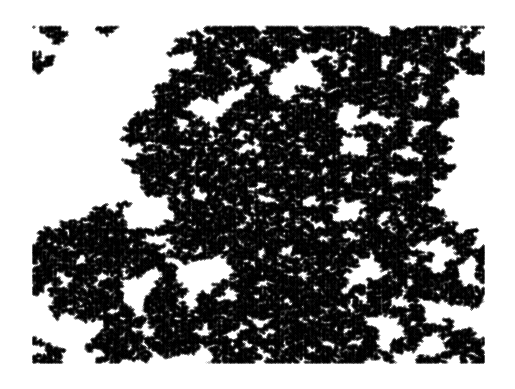

In [391]:
C = nx.Graph()
C.add_nodes_from(clusters[max_index[0]])

x, y = np.array(list(clusters[max_index[0]])).T[0], np.array(list(clusters[max_index[0]])).T[1]
plt.plot(x, y, 'o', markersize=1/np.log(m*n), color="k")
plt.axis("off")
plt.savefig("./figures/thermmodynamics_limit_grid.png")

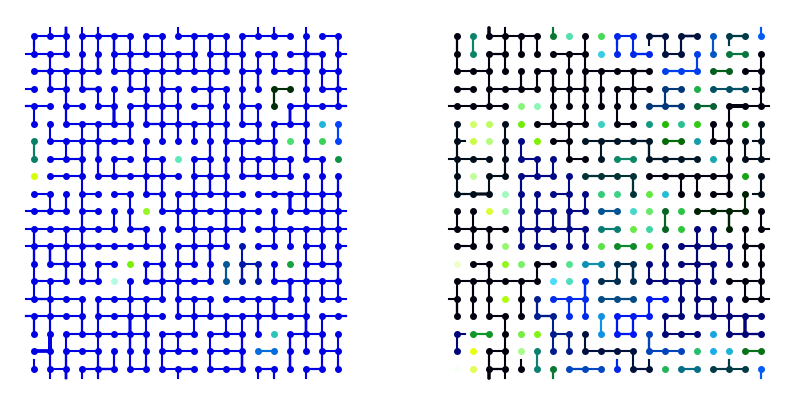

In [392]:
def plot_grid_clusters(m, n, p, z):
    G = grid_percolation(m, n, p)
    clusters = list(nx.connected_components(G))
    indices = np.argsort([len(x) for x in clusters])
    sorted_indices = indices[::-1]
    sorted_clusters = np.array(clusters)[sorted_indices]
    color_list = []
    for i in range(len(sorted_clusters)):
        r, g, b = (i/len(clusters))**3, np.abs(np.sin(np.pi*i/2/len(clusters))), np.random.random()
        color_list.append((r, g, b))

    for i, cluster in enumerate(sorted_clusters):
        color = color_list[i]
        visted_nodes = []
        for c in cluster:
            visted_nodes.append(c)
            ax[z].plot(c[0], c[1], "o", color=color, markersize=4)
            for e in G.neighbors(c):
                if e not in visted_nodes:
                    x = []
                    y = []
                    n1, n2 = c, e
                    # if top row connect with the bottom row
                    if (n1[1] == 0 and n2[1] == n-1) or (n2[1] == 0 and n1[1] == n-1):
                        x.append(n1[0])
                        y.append(n1[1])
                        x.append(n1[0])
                        y.append(n1[1] + 1/2)

                        x.append(n2[0])
                        y.append(n2[1])   
                        x.append(n2[0])
                        y.append(n2[1] - 1/2)
                    # if the left column connect with the right column
                    elif (n1[0] == 0 and n2[0] == m-1) or (n2[0] == 0 and n1[0] == m-1):
                        x.append(n1[0])
                        y.append(n1[1])
                        x.append(n1[0] + 1/2)
                        y.append(n1[1])

                        x.append(n2[0])
                        y.append(n2[1])
                        x.append(n2[0] - 1/2)
                        y.append(n2[1])
                    
                    else:
                        x.append(n1[0])
                        y.append(n1[1])
                        x.append(n2[0])
                        y.append(n2[1])
                
                if len(x) > 3:
                    ax[z].plot(x[:2], y[:2], "-", color=color)
                    ax[z].plot(x[2:], y[2:], "-", color=color)
                else:
                    ax[z].plot(x, y, "-", color=color)
        ax[z].axis("off")
    
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

m, n, p = 20, 20, 0.4
plot_grid_clusters(m, n, p, 0)

m, n, p = 20, 20, 0.6
plot_grid_clusters(m, n, p, 1)

plt.savefig("./figures/grid_percolation_transition.png")


## Site percolation on a triangular lattice

In [393]:
def triangular_percolation(m, n, p, periodic=True, create_using=None):
    """Returns the triangular percolated graph
    
    The percolated graph disconnected edges by probability p

    Parameters
    ----------
    m, n : int or iterable container of nodes
        If an integer, nodes are from `range(n)`.
        If a container, elements become the coordinate of the nodes.
    
    p : int
        Each connected edges from the lattice has probability p
        to be removed.

    periodic : bool or iterable
        If `periodic` is True, both dimensions are periodic. If False, none
        are periodic.  If `periodic` is iterable, it should yield 2 bool
        values indicating whether the 1st and 2nd axes, respectively, are
        periodic.

    create_using : NetworkX graph constructor, optional (default=nx.Graph)
        Graph type to create. If graph instance, then cleared before populated.
    """
    G = nx.triangular_lattice_graph(m, n, periodic=False, create_using=None)
    for n in list(G.nodes):
        if np.random.random() < p:
            G.remove_node(n)
    return G


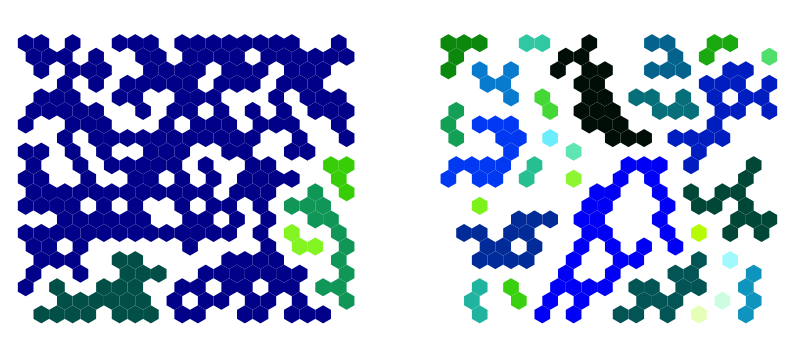

In [394]:
from matplotlib import patches

def plot_triangular_cluster(G, m, n, z):
    clusters = list(nx.connected_components(G))
    indices = np.argsort([len(x) for x in clusters])
    sorted_indices = indices[::-1]
    sorted_clusters = np.array(clusters)[sorted_indices]


    for i, c in enumerate(sorted_clusters):
        r, g, b = (i/len(clusters))**3, np.abs(np.sin(np.pi*i/2/len(clusters))), np.random.random()
        radius = 1/np.sqrt(3)
        for node in c:
            pos = nx.get_node_attributes(G, "pos")[node]
            hexagon = patches.RegularPolygon(pos, 6, radius=radius, facecolor=(r, g, b))
            ax[z].add_patch(hexagon)
    

    ax[z].set_aspect('equal')
    ax[z].set_xlim(-1, n/2+1.5)
    ax[z].set_ylim(-1, m-1/2)
    ax[z].axis("off")

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

m, n, p = 20, 40, 0.4
G = triangular_percolation(m, n, p)
plot_triangular_cluster(G, m, n, 0)

m, n, p = 20, 40, 0.6
G = triangular_percolation(m, n, p)
plot_triangular_cluster(G, m, n, 1)

plt.savefig("./figures/triangular_percolation.png")

In [395]:
m, n, p = 1024, 2*1024, 0.5

G = triangular_percolation(m, n, p)
clusters = list(nx.connected_components(G))


max_val = 0
max_index = []
for i, j in enumerate(clusters):
    if len(j) > max_val:
        max_index = [i]
        max_val = len(j)
    elif len(j) == max_val:
        max_index.append(i)

print(max_val, max_index)

149938 [67]


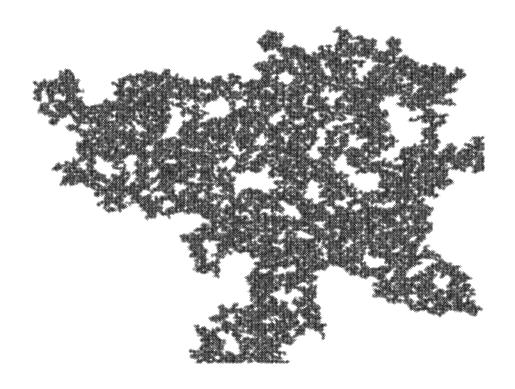

In [396]:
C = nx.Graph()
C.add_nodes_from(clusters[max_index[0]])

x, y = np.array(list(clusters[max_index[0]])).T[0], np.array(list(clusters[max_index[0]])).T[1]
plt.plot(x, y, 'o', markersize=1/np.log(m*n), color="k")
plt.axis("off")

plt.savefig("./figures/thermmodynamics_limit_triangular.png")

## Percolation and Universality

### Cluster size distribution: power laws at $p_{c}$

In [397]:
def cluster_distribution(G):
    a = list(nx.connected_components(G))
    size_list = []
    for i in a:
        size_list.append(len(i))
    return size_list

In [398]:
m, n, p = 500, 500, 0.5
G = grid_percolation(m, n, p)
grid_sd = cluster_distribution(G)

G = triangular_percolation(m, n, p)
triangular_sd = cluster_distribution(G)


In [399]:
g_sd = [i for i in grid_sd if i < 50]
g_counts, g_bins = np.histogram(g_sd, bins=5, density=True)

t_sd = [i for i in triangular_sd if i < 50]
t_counts, t_bins = np.histogram(t_sd, bins=5, density=True)


Text(0.5, 0, '$\\log(S)$')

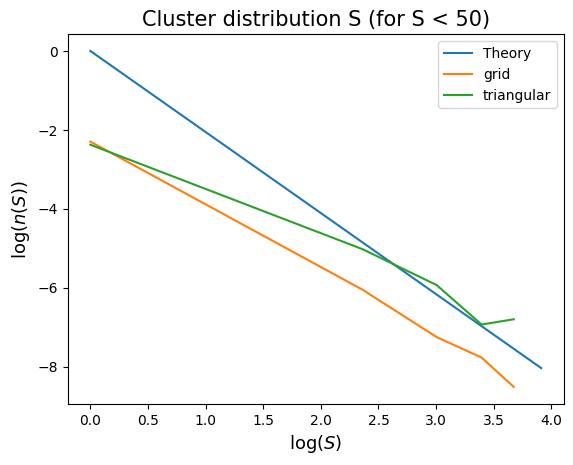

In [ ]:
x = np.linspace(1, 50, 1000)
y = x**(-187/91)

plt.plot(np.log(x), np.log(y), label="Theory")
plt.plot(np.log(g_bins[:-1]), np.log(g_counts), label="grid")
plt.plot(np.log(t_bins[:-1]), np.log(t_counts), label="triangular")
plt.legend()
plt.title("Log-Log Plot of Cluster distribution (S < 50)", fontsize=15)
plt.ylabel(r"$\log(n(S))$", fontsize=13)
plt.xlabel(r"$\log(S)$", fontsize=13)

In [401]:
g_sd = grid_sd
t_sd = triangular_sd

largest_len = 0
for i in g_sd:
    if i > largest_len:
        largest_len = i

for j in t_sd:
    if j > largest_len:
        largest_len = j

adj_bins = [1]
bin_gap = 1
while bin_gap < largest_len:
    bin_gap *= 1.2
    adj_bins.append(bin_gap)

g_counts, g_bins = np.histogram(g_sd, bins=adj_bins, density=True)
t_counts, t_bins = np.histogram(t_sd, bins=adj_bins, density=True)

/tmp/ipykernel_126132/4262735694.py:5: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(g_bins[:-1]), np.log(g_counts), label="grid")
/tmp/ipykernel_126132/4262735694.py:6: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(t_bins[:-1]), np.log(t_counts), label="triangular")


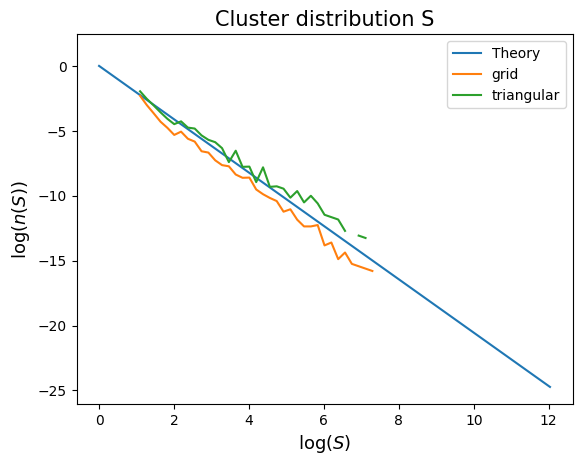

In [402]:
x = np.linspace(1, adj_bins[-1], 1000)
y = x**(-187/91)

plt.plot(np.log(x), np.log(y), label="Theory")
plt.plot(np.log(g_bins[:-1]), np.log(g_counts), label="grid")
plt.plot(np.log(t_bins[:-1]), np.log(t_counts), label="triangular")
plt.legend()
plt.title("Log-Log Plot of Cluster distribution", fontsize=15)
plt.ylabel(r"$\log(n(S))$", fontsize=13)
plt.xlabel(r"$\log(S)$", fontsize=13)

plt.savefig("./figures/cluster_distribution.png")

### The size of the infinite cluster: power laws near $p_{c}$

In [403]:
def largest_cluster_size(G):
    a = list(nx.connected_components(G))
    largest = 0
    for i in a:
        if len(i) > largest:
            largest = len(i)
    return largest


In [404]:
N = 10
p_c = 0.5
p_vals = np.array([p_c + 2**(-n) for n in range(1, N, 1)])

L = 200

g_fractions = []
t_fractions = []
for p in p_vals:
    G = grid_percolation(L, L, 1-p)
    P = largest_cluster_size(G)/(L*L)
    g_fractions.append(P)
    G = triangular_percolation(L, L, 1-p)
    P = largest_cluster_size(G)/(L*L)
    t_fractions.append(P)



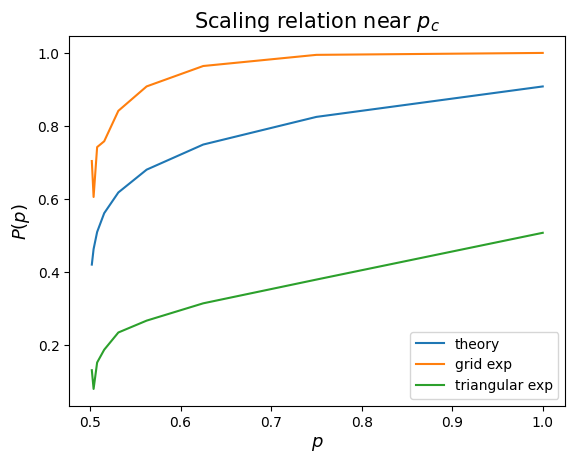

In [405]:
beta = 5/36
P_theory = (p_vals - p_c)**beta

plt.plot(p_vals, P_theory, label="theory")
plt.plot(p_vals, g_fractions, label="grid exp")
plt.plot(p_vals, t_fractions, label="triangular exp")


plt.title(r"Scaling relation near $p_{c}$", fontsize=15)
plt.ylabel(r"$P(p)$", fontsize=13)
plt.xlabel(r"$p$", fontsize=13)
plt.legend()

plt.savefig("./figures/scaling_relation_near_pc.png")

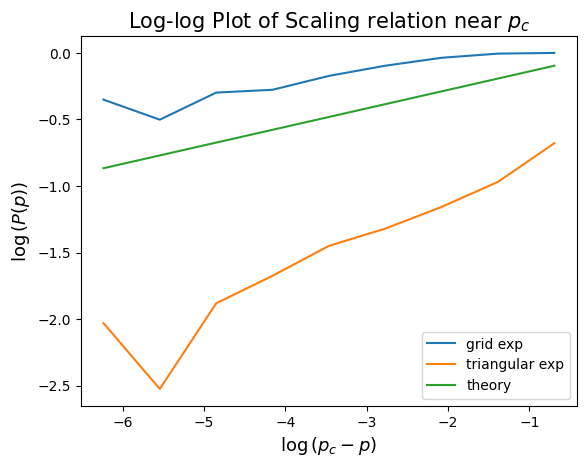

In [406]:
x_t, y_t = np.log(p_vals - p_c), np.log(P_theory)
x_e, grid_y_e, triangular_y_e = np.log(p_vals - p_c), np.log(g_fractions), np.log(t_fractions)
plt.plot(x_e, grid_y_e, label="grid exp")
plt.plot(x_e, triangular_y_e, label="triangular exp")
plt.plot(x_t, y_t, label="theory")

plt.title(r"Log-log Plot of Scaling relation near $p_{c}$", fontsize=15)
plt.ylabel(r"$\log{(P(p))}$", fontsize=13)
plt.xlabel(r"$\log{(p_c - p)}$", fontsize=13)
plt.legend()

plt.savefig("./figures/log_log_plot_scaling_relation_near_pc.png")

### Finite-size Scaling

In [407]:
def L_dependent_cluster(L, p):
    G = grid_percolation(L, L, 1-p)
    P = largest_cluster_size(G)
    return P/(L*L)

In [408]:
L = [5, 10, 20, 50, 100]
p = [[p for p in np.linspace(0.25+N*0.05, 0.75-N*0.05, 10)] for N in range(len(L))]
avg_rep = 10

cluster_sizes = [[] for i in range(len(L))]
for i, j in enumerate(L):
    p_list = p[i]
    for k in p_list:
        size_sum = 0
        for _ in range(avg_rep):
            size_sum += L_dependent_cluster(j, k)
        avg_size = size_sum / avg_rep
        cluster_sizes[i].append(avg_size)

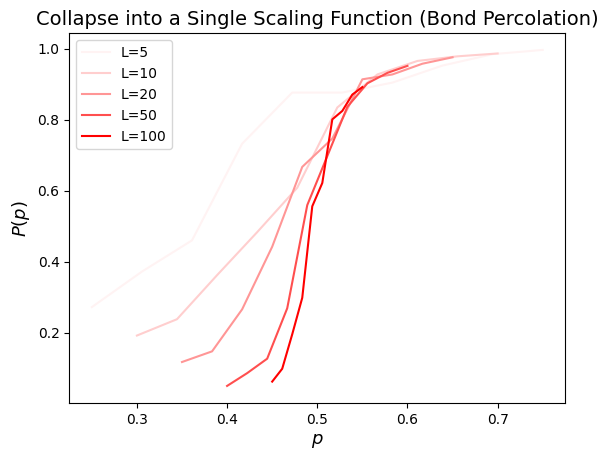

In [409]:
for i, j in enumerate(cluster_sizes):
    c = (i+1)/len(cluster_sizes)
    plt.plot(p[i], j, label=f"L={L[i]}", color=(1, abs(np.cos(np.pi*c/2)), abs(np.cos(np.pi*c/2))))
plt.legend()
plt.ylabel(r"$P(p)$", fontsize=13)
plt.xlabel(r"$p$", fontsize=13)
plt.title("Collapse into a Single Scaling Function (Bond Percolation)", fontsize=14)

plt.savefig("./figures/collapse_into_ingle_scaling_function_bond.png")

In [410]:
nu = 4/3
beta = 5/36
p_c = 1/2
m = -390/45
b = 400 + 390/9


def linear(x):
    return int(m*x + b)


def Y(L, p):
    return L**(beta/nu) * L_dependent_cluster(L, p)


def X(L, p):
    return (p - p_c) * L**(1/nu)


def L_dependent_cluster(L, p, grid=True):
    if grid:
        G = grid_percolation(L, L, 1-p)
    else:
        G = triangular_percolation(L, L, 1-p)
    P = largest_cluster_size(G)
    return P/(L*L)


In [411]:
L = [5, 10, 20, 50]
p_vals = [[p for p in np.linspace(0.25+N*0.05, 0.75-N*0.05, 10)] for N in range(len(L))]
avg_rep = [linear(x) for x in L]
X_list = [[] for k in range(len(L))]


g_cluster_sizes = [[] for i in range(len(L))]
t_cluster_sizes = [[] for i in range(len(L))]
for i, j in enumerate(L):
    p_list = p_vals[i]
    for k in p_list:
        g_size_sum = 0
        t_size_sum = 0
        X_list[i].append(X(j, k))
        for _ in range(avg_rep[i]):
            g_size_sum += L_dependent_cluster(j, k, True)
            t_size_sum += L_dependent_cluster(j, k, False)
        g_avg_size = g_size_sum / avg_rep[i]
        t_avg_size = t_size_sum / avg_rep[i]

        g_cluster_sizes[i].append(g_avg_size)
        t_cluster_sizes[i].append(t_avg_size)


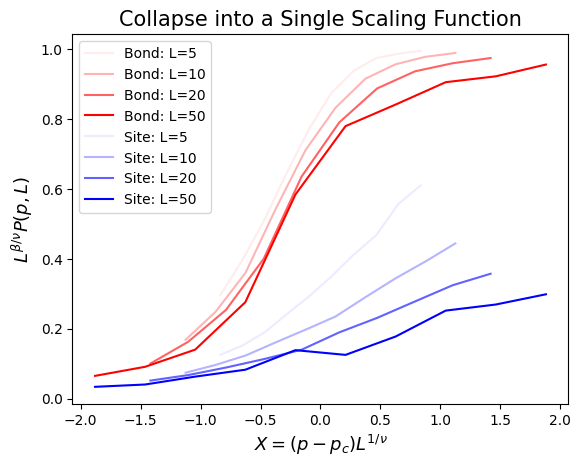

In [412]:
for i in range(len(g_cluster_sizes)):
    c = (i+1)/len(g_cluster_sizes)
    plt.plot(X_list[i], g_cluster_sizes[i], label=f"Bond: L={L[i]}", color=(1, abs(np.cos(np.pi*c/2)), abs(np.cos(np.pi*c/2))))

for i in range(len(t_cluster_sizes)):
    c = (i+1)/len(t_cluster_sizes)
    plt.plot(X_list[i], t_cluster_sizes[i], label=f"Site: L={L[i]}", color=(abs(np.cos(np.pi*c/2)), abs(np.cos(np.pi*c/2)), 1))

plt.legend()
plt.ylabel(r"$L^{\beta/\nu}P(p, L)$", fontsize=13)
plt.xlabel(r"$X = (p -p_{c}) L^{1/\nu}$", fontsize=13)
plt.title("Collapse into a Single Scaling Function", fontsize=15)

plt.savefig("./figures/collapse_into_ingle_scaling_function.png")